In [11]:
import pandas as pd
vimana_df = pd.read_csv(r'C:\Users\heena\Downloads\vimana.csv')
vimana_df.head(5)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [12]:
vimana_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


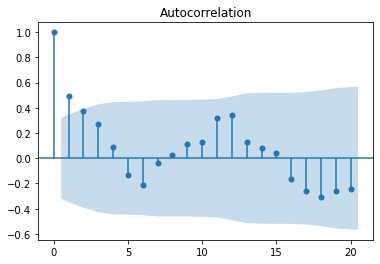

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Show autocorrelation upto lag 10
acf_plot = plot_acf( vimana_df.demand,
lags=20)


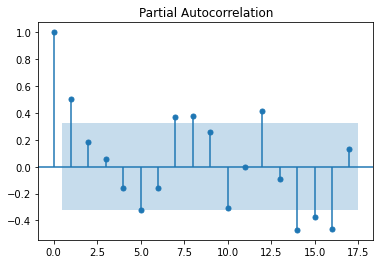

In [18]:
pacf_plot = plot_pacf( vimana_df.demand,lags=17 ) 

# Building AR Model


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(), 
              order = (1,0,0))

ar_model = arima.fit()
 

c:\users\heena\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
ar_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 375.7336
Dependent Variable: y                Log-Likelihood:      -182.77 
Date:               2020-11-10 04:47 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 106.593 
No. Iterations:     14.0000          HQIC:                372.875 
AIC:                371.5300                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       513.4432   35.9147  14.2962  0.0000  443.0517  583.8347
ar.L1.y       0.4726    0.1576   2.9995  0.0027    0.1638    0.7814
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          2.1161             0.0000           2.1161             0.0000
==================================================================

"""

In [21]:
forecast_31_37 = ar_model.predict(30, 36)
forecast_31_37 


array([480.15336404, 497.71119117, 506.00861729, 509.92979044,
       511.78284688, 512.65855882, 513.07240018])

In [22]:
import numpy as np
def get_mape(actual, predicted):
 y_true, y_pred = np.array(actual), np.array(predicted)
 return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 ) 

In [23]:
get_mape( vimana_df.demand[30:],
forecast_31_37 ) 

19.12

# Moving Average (MA) Processes

In [24]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(),
order = (0,0,1))
ma_model = arima.fit()
ma_model.summary2() 


c:\users\heena\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 378.7982
Dependent Variable: y                Log-Likelihood:      -184.30 
Date:               2020-11-10 04:47 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       28                                    0       
Converged:          1.0000           S.D. of innovations: 112.453 
No. Iterations:     15.0000          HQIC:                375.939 
AIC:                374.5946                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       516.5429   26.8307  19.2520  0.0000  463.9558  569.1301
ma.L1.y       0.3173    0.1421   2.2327  0.0256    0.0388    0.5958
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -3.1518            0.0000          3.1518            0.5000
==================================================================

"""

In [11]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape( vimana_df.demand[30:],
forecast_31_37 ) 

17.8

# ARMA Model

In [25]:
arima = ARIMA( vimana_df.demand[0:30].astype(np.float64).to_numpy(),
order = (1,0,1))
arma_model = arima.fit()
arma_model.summary2() 


c:\users\heena\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 377.2964
Dependent Variable: y                Log-Likelihood:      -181.85 
Date:               2020-11-10 04:47 Scale:               1.0000  
No. Observations:   30               Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       27                                    0       
Converged:          1.0000           S.D. of innovations: 103.223 
No. Iterations:     20.0000          HQIC:                373.485 
AIC:                371.6916                                      
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       508.4008   45.3277  11.2161  0.0000  419.5601  597.2414
ar.L1.y       0.7421    0.1681   4.4158  0.0000    0.4127    1.0715
ma.L1.y      -0.3394    0.2070  -1.6400  0.1010   -0.7451    0.0662
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.3475             0.0000           1.3475             0.0000
MA.1          2.9461             0.0000           2.9461             0.0000
==================================================================

"""

In [26]:
forecast_31_37 = arma_model.predict(30, 36)
get_mape( vimana_df.demand[30:],
forecast_31_37 ) 

20.27